In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [150]:
train = pd.read_csv('Data/end_train.csv')
train.drop(columns=['Unnamed: 0'],inplace=True)

test = pd.read_csv('Data/end_test.csv')

# Exploratory Data Analysis

In [151]:
print(train.shape)
train.info()

(1100, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1100 non-null   float64
 1   volatile acidity      1100 non-null   float64
 2   citric acid           1100 non-null   float64
 3   residual sugar        1100 non-null   float64
 4   chlorides             1100 non-null   float64
 5   free sulfur dioxide   1100 non-null   float64
 6   total sulfur dioxide  1100 non-null   float64
 7   density               880 non-null    float64
 8   pH                    880 non-null    float64
 9   sulphates             1100 non-null   float64
 10  alcohol               1100 non-null   float64
 11  quality_bool          1100 non-null   float64
dtypes: float64(12)
memory usage: 103.2 KB


In [152]:
train.isna().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 220
pH                      220
sulphates                 0
alcohol                   0
quality_bool              0
dtype: int64

In [153]:
train_nonan = train.dropna(axis=0)
print('total shared missing values:',train.shape[0] - train_nonan.shape[0])

total shared missing values: 390


In [154]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,880.000000,880.000000,1100.000000,1100.000000,1100.000000
mean,8.697636,0.522468,0.296609,2.585636,0.089919,15.220909,47.457273,0.997218,3.290591,0.666073,10.312091,0.520000
std,1.796350,0.179265,0.199428,1.284788,0.049086,10.128443,34.355829,0.001809,0.154256,0.179362,1.060169,0.499827
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,0.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996200,3.180000,0.560000,9.500000,0.000000
50%,8.300000,0.510000,0.290000,2.300000,0.081000,12.500000,38.000000,0.997200,3.290000,0.620000,10.000000,1.000000
75%,9.725000,0.630000,0.470000,2.700000,0.093000,21.000000,63.000000,0.998200,3.390000,0.732500,11.000000,1.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003150,3.900000,2.000000,14.900000,1.000000


In [155]:
train.quality_bool.value_counts(normalize=True) # our dataset is already balanced

1.0    0.52
0.0    0.48
Name: quality_bool, dtype: float64

#### `Scatterplot`

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

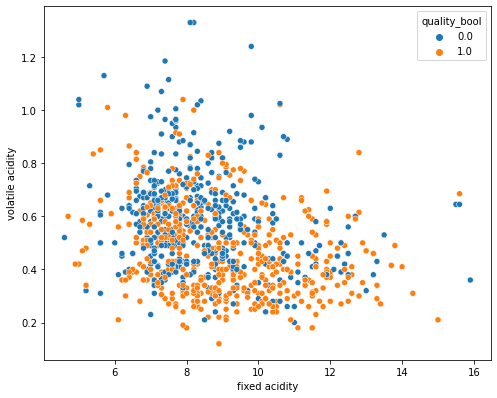

In [156]:
sns.scatterplot(data=train, x="fixed acidity", y="volatile acidity",hue='quality_bool') 

#### `Pairplot`

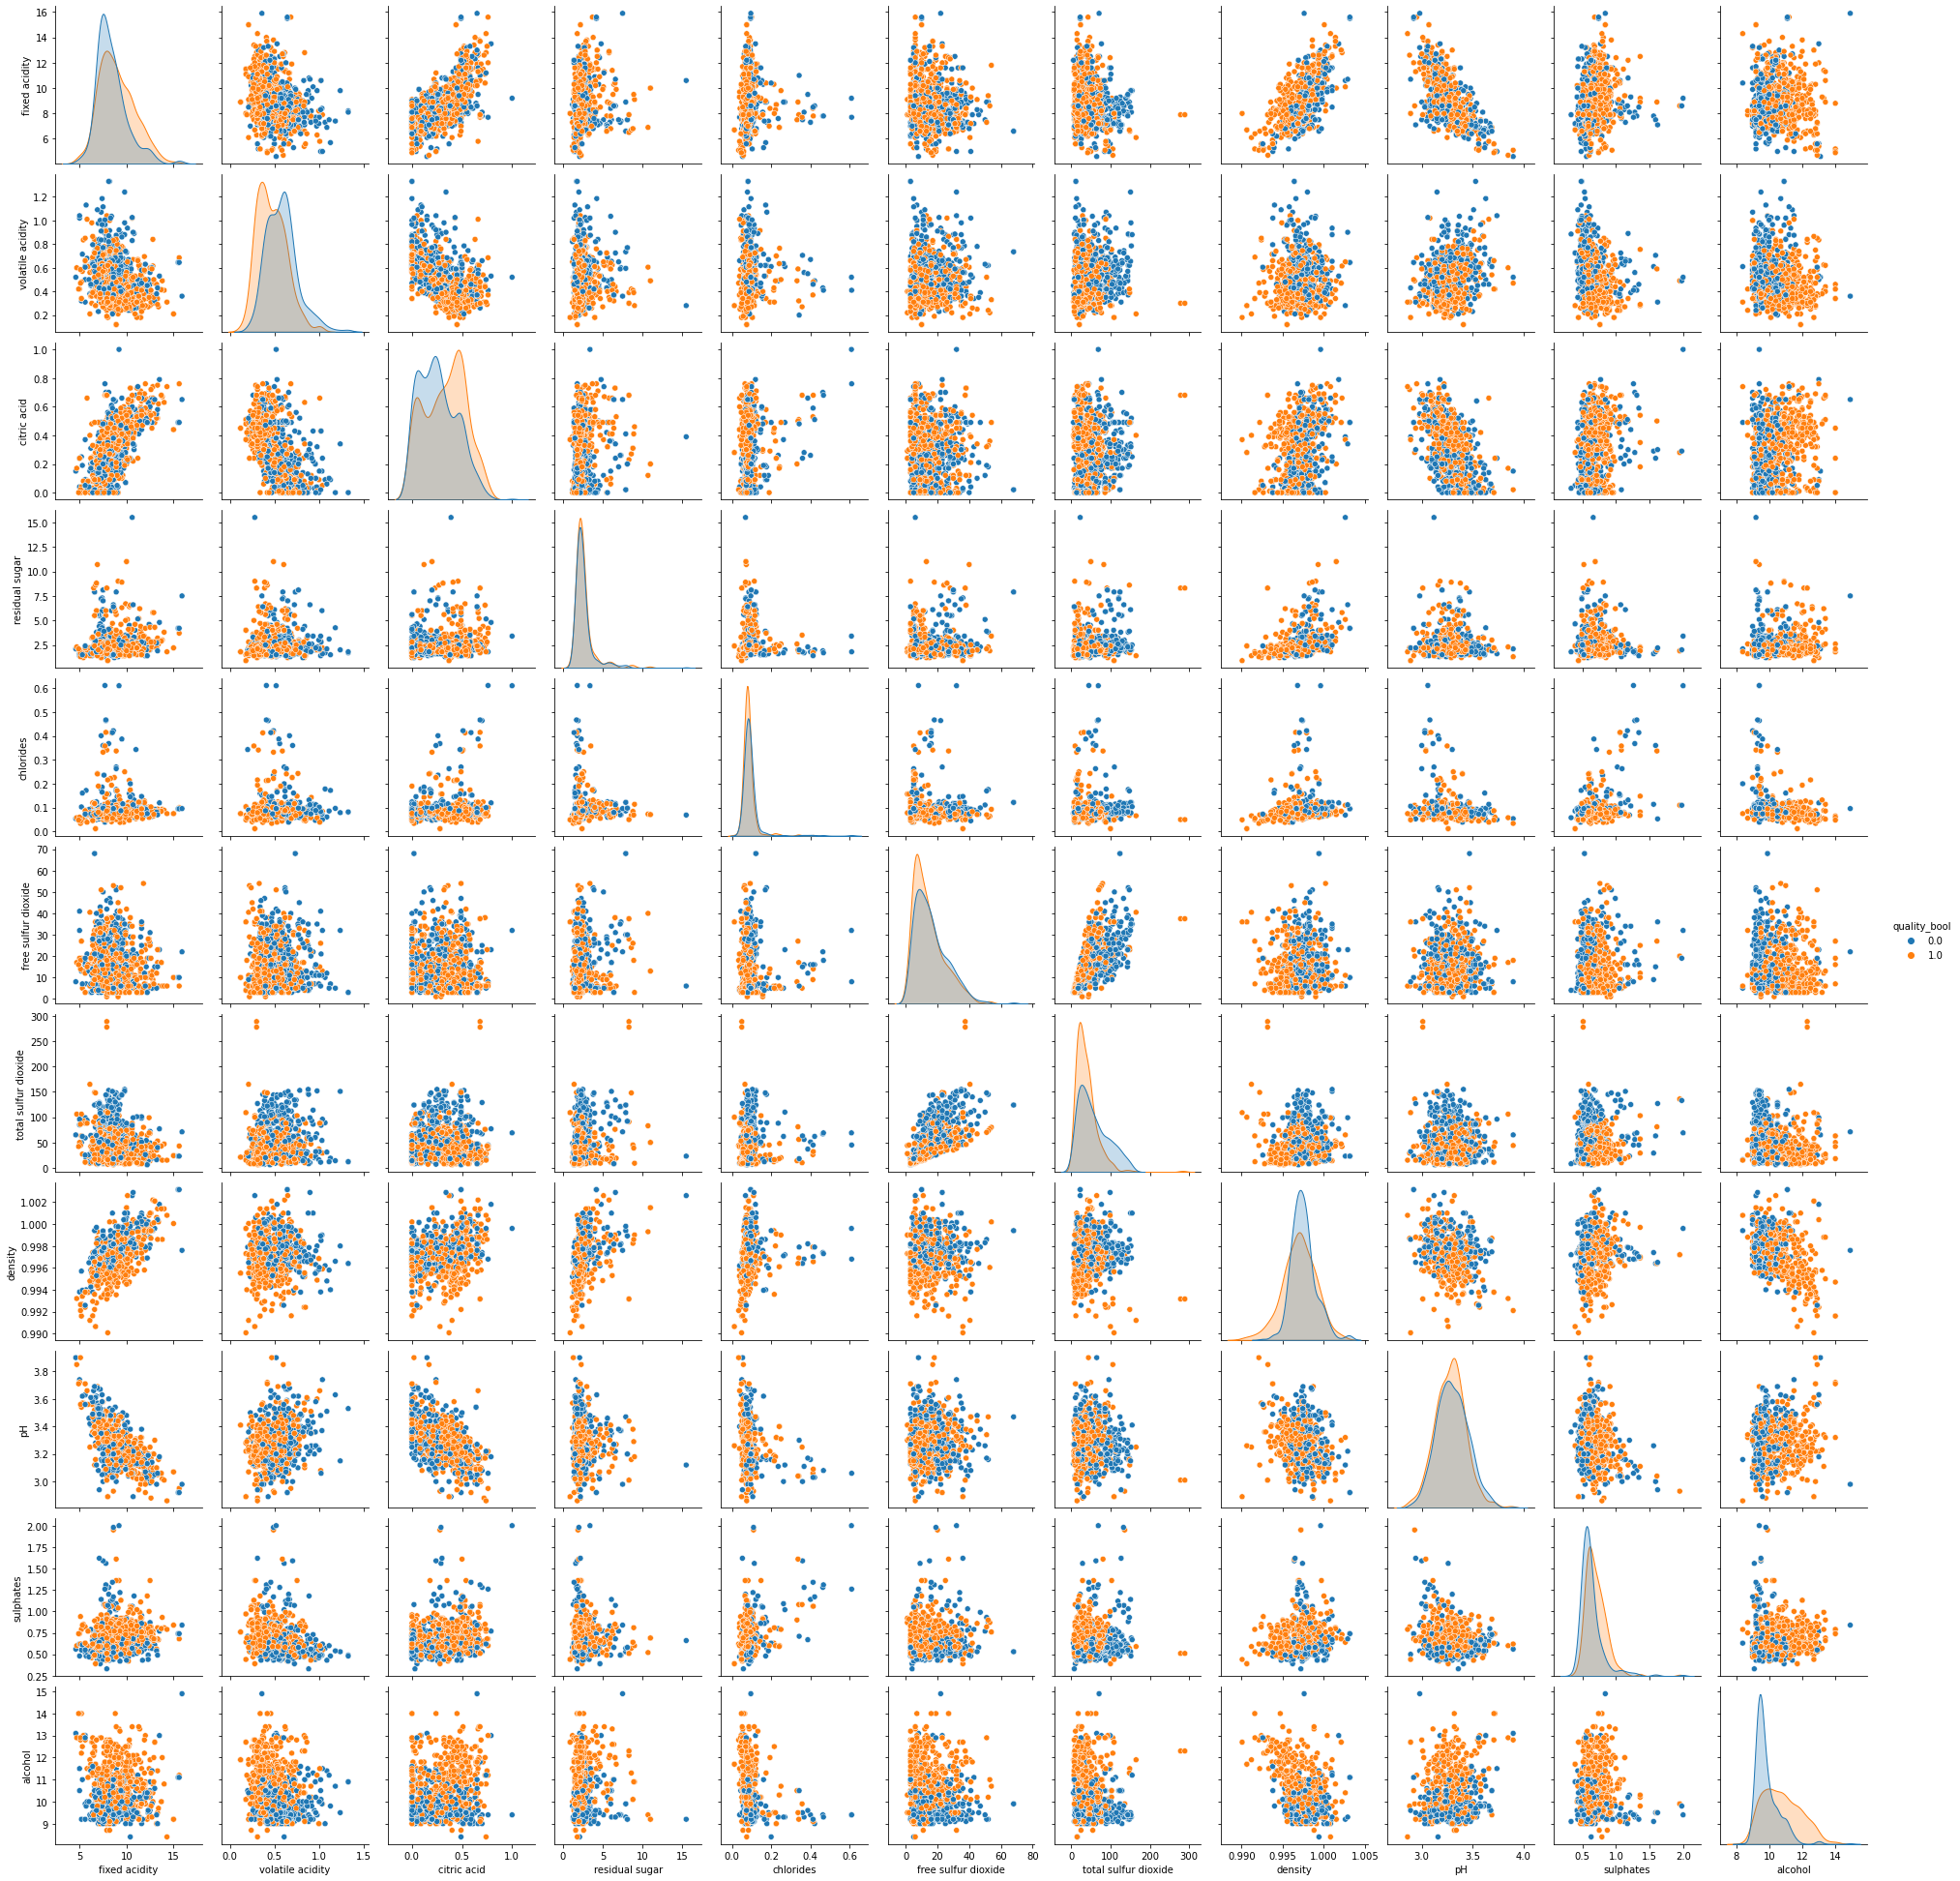

In [385]:
pairplot = sns.pairplot(train, hue='quality_bool')
plt.show()

#### `Violinplot`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


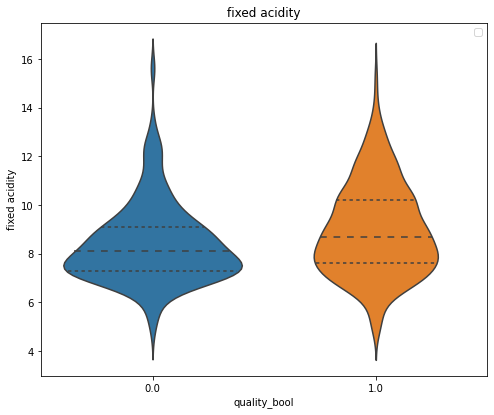

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


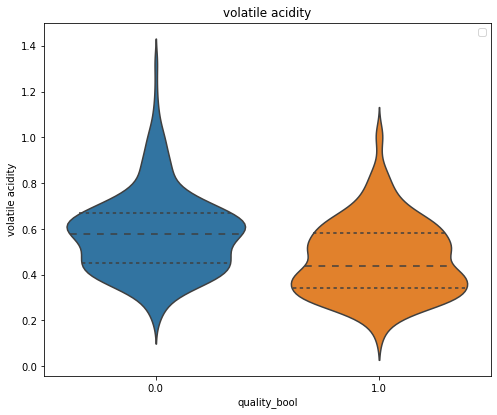

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


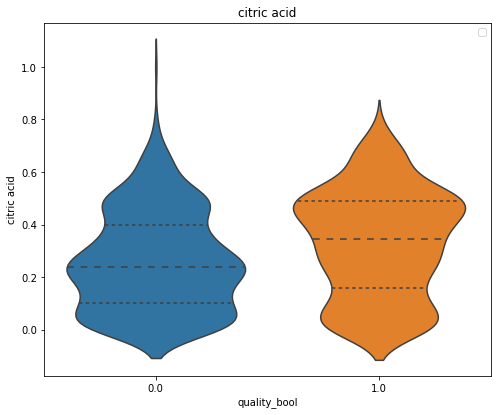

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


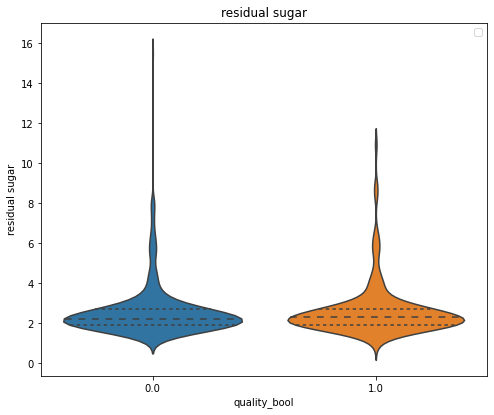

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


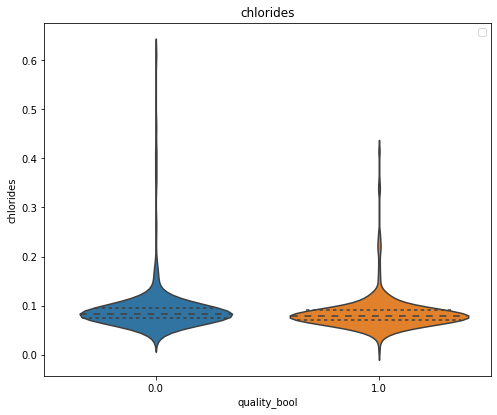

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


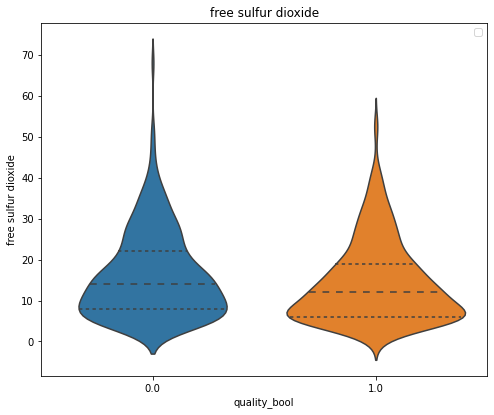

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


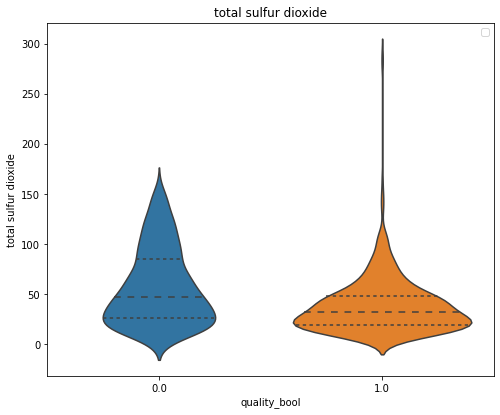

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


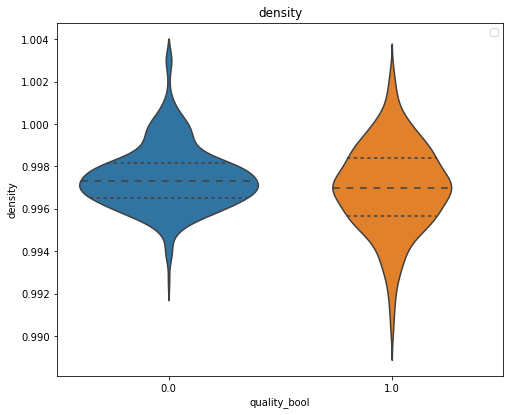

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


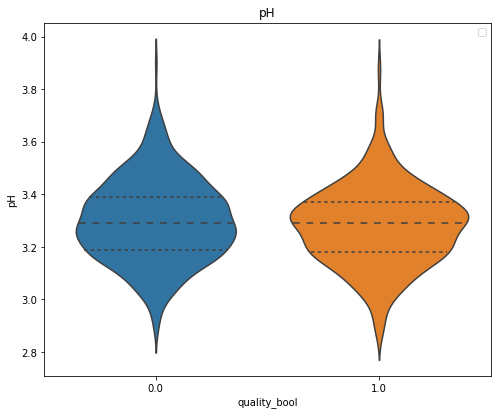

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


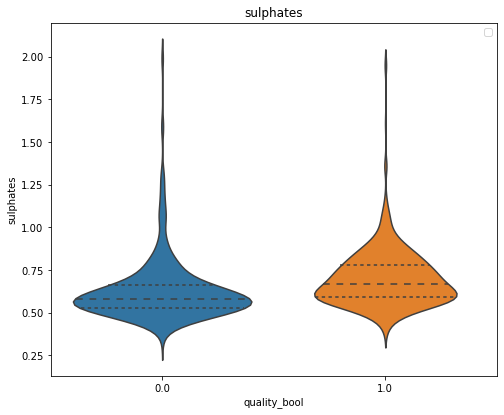

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


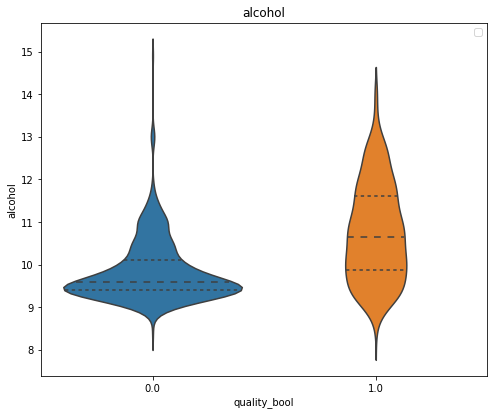

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


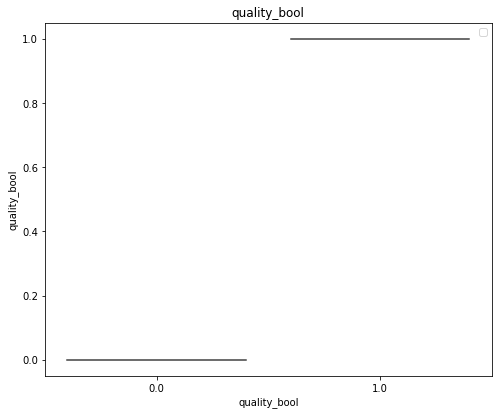

In [386]:
n_columns = train.select_dtypes(np.number).columns # list of every numerical column/features

for col in n_columns:
    violinplot = sns.violinplot(data = train, x = 'quality_bool', y = col,  inner="quartile")
    plt.title(col)
    plt.legend()
    plt.show()

#### `Heatmap`

<AxesSubplot:>

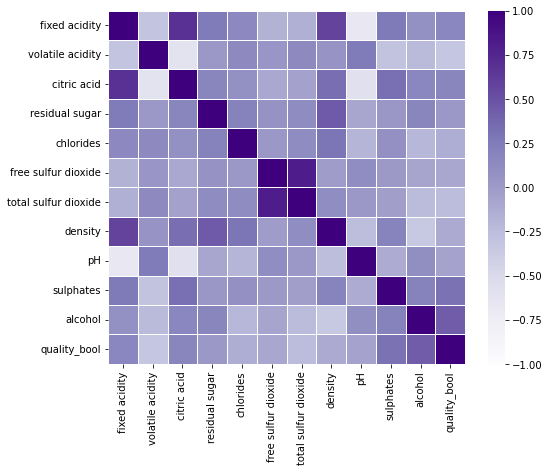

In [387]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='spearman'), vmin = -1, vmax=1, linewidths=.5,cmap='Purples')

In [388]:
train.corr(method='spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
fixed acidity,1.000000,-0.306090,0.692725,0.250593,0.147347,-0.166616,-0.152074,0.582784,-0.676273,0.265557,0.091223,0.166678
volatile acidity,-0.306090,1.000000,-0.604218,0.026532,0.134476,0.040498,0.135556,0.054800,0.251758,-0.303477,-0.227131,-0.321681
citric acid,0.692725,-0.604218,1.000000,0.172192,0.086688,-0.096628,-0.053255,0.329179,-0.572213,0.325443,0.164523,0.176360
residual sugar,0.250593,0.026532,0.172192,1.000000,0.203531,0.067299,0.117582,0.448224,-0.080132,0.036662,0.179419,0.023453
chlorides,0.147347,0.134476,0.086688,0.203531,1.000000,0.025976,0.118180,0.295853,-0.195121,0.082072,-0.204788,-0.140140
free sulfur dioxide,-0.166616,0.040498,-0.096628,0.067299,0.025976,1.000000,0.806195,-0.014153,0.110103,0.014193,-0.071089,-0.091127
total sulfur dioxide,-0.152074,0.135556,-0.053255,0.117582,0.118180,0.806195,1.000000,0.115491,0.030869,-0.028352,-0.241661,-0.247885
density,0.582784,0.054800,0.329179,0.448224,0.295853,-0.014153,0.115491,1.000000,-0.252273,0.197339,-0.337253,-0.112685
pH,-0.676273,0.251758,-0.572213,-0.080132,-0.195121,0.110103,0.030869,-0.252273,1.000000,-0.123438,0.107000,-0.059566
sulphates,0.265557,-0.303477,0.325443,0.036662,0.082072,0.014193,-0.028352,0.197339,-0.123438,1.000000,0.207366,0.310240


## Let's try elimintating some highly correlated features

- free sulfur dioxide and total sulfer dioxide are too mush similar
- fixed acidity and citric acid are also too much similar
- maybe remove density (later)

##### Let's remove `free sulfur dioxide` and `citric acid` since they're not too general as `total sulfur dioxide` and `fixed acidity`.

In [157]:
train.drop(columns=['free sulfur dioxide','citric acid'],inplace=True)

- Now our `heatmap` looks like:

<AxesSubplot:>

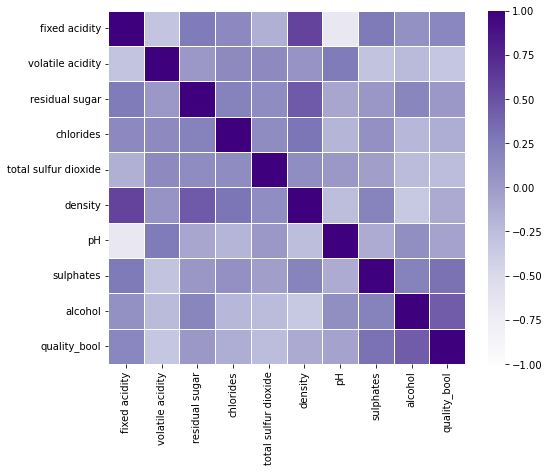

In [390]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='spearman'), vmin = -1, vmax=1, linewidths=.5,cmap='Purples')

# Missing Data Imputation Approach

To restore the missing data from `pH` and `density` columns we we'll use the avanced imputation approach described in the website: 
https://towardsdatascience.com/filling-in-the-gaps-imputation-3-ways-6056c09b6417

In [391]:
# train['density'].fillna(train['density'].mean(),inplace=True)

### We'll begin by `density`

In [158]:
train.drop(['pH'], axis = 1).dropna().drop(['density'], axis = 1)

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality_bool
0,7.4,0.700,1.9,0.076,34.0,0.56,9.4,0.0
1,7.8,0.880,2.6,0.098,67.0,0.68,9.8,0.0
2,7.8,0.760,2.3,0.092,54.0,0.65,9.8,0.0
3,11.2,0.280,1.9,0.075,60.0,0.58,9.8,1.0
4,7.4,0.700,1.9,0.076,34.0,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...
1095,9.4,0.400,2.5,0.087,20.0,0.50,10.5,0.0
1096,6.6,0.725,5.5,0.117,17.0,0.49,10.8,1.0
1097,8.6,0.520,1.5,0.096,18.0,0.52,9.4,0.0
1098,8.0,0.310,2.1,0.216,16.0,0.81,12.5,1.0


In [159]:
X = train.drop(['pH'], axis = 1).dropna().drop(['density'], axis = 1).values
y = train.drop(['pH'], axis = 1).dropna()['density'].values


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [164]:
param_grid = {"n_estimators": list(range(10,121,4)),
              'max_features' : list(range(1,10,1))
              }

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), n_iter=10000, 
                                                        param_distributions=param_grid)
random_search.fit(X,y)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",random_search.best_estimator_)
print("\n The best parameters across ALL searched params:\n",random_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features=7, n_estimators=30, random_state=42)

 The best parameters across ALL searched params:
 {'n_estimators': 30, 'max_features': 7}


In [162]:
forest = RandomForestRegressor(max_features=7, min_weight_fraction_leaf=0,
                      n_estimators=30, random_state=42)

In [165]:
kf = KFold(n_splits=5)
r2 = []
mse = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    forest.fit(X_train, y_train)
    y_test_pred = forest.predict(X_test)
    
    r2.append(r2_score(y_test, y_test_pred))
    mse.append(mean_squared_error(y_test, y_test_pred))

print(r2,mse)

[0.6826514226042811, 0.7848599823288105, 0.5072562573843917, 0.7218970019159561, 0.643634360521388] [4.243536287879139e-07, 7.169988371212213e-07, 1.4220896433080453e-06, 6.819077531565277e-07, 9.19421434343488e-07]


In [346]:
# kf = KFold(n_splits=8)
# scores = []
# scores2 = []

# reg = LinearRegression()

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     reg.fit(X_train, y_train)
#     y_test_pred = reg.predict(X_test)
    
#     scores.append(r2_score(y_test, y_test_pred))
#     scores2.append(mean_squared_error(y_test, y_test_pred))

# print(scores)
# print(scores2)

In [166]:
X_nan = train.drop(['pH'], axis = 1)[train.drop(['pH'], axis = 1)['density'].isna()]
X_nan.drop(columns=['density'],inplace=True)
X_nan

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality_bool
12,5.6,0.615,1.6,0.089,59.0,0.52,9.9,0.0
14,8.9,0.620,3.8,0.176,145.0,0.88,9.2,0.0
18,7.4,0.590,4.4,0.086,29.0,0.50,9.0,0.0
26,7.6,0.410,1.8,0.080,11.0,0.59,9.5,0.0
27,7.9,0.430,1.6,0.106,37.0,0.91,9.5,0.0
...,...,...,...,...,...,...,...,...
1065,7.7,0.610,2.4,0.083,20.0,0.60,10.2,1.0
1067,11.1,0.310,2.2,0.060,10.0,0.83,10.9,1.0
1070,9.3,0.330,1.5,0.057,37.0,0.89,11.1,1.0
1083,8.7,0.420,2.4,0.072,59.0,0.77,12.0,1.0


In [167]:
y_pred = forest.predict(X_nan)
y_pred

array([0.99560967, 0.998965  , 0.997359  , 0.99656667, 0.99679633,
       0.99715933, 0.99662233, 0.99793833, 0.99668233, 0.99319533,
       0.99581333, 0.99671467, 0.99809667, 0.99631733, 0.998143  ,
       0.99697967, 0.997292  , 0.996549  , 0.99675167, 0.996593  ,
       0.996554  , 0.99659267, 0.996299  , 0.99232067, 0.99232067,
       0.99661833, 0.99599833, 0.995516  , 0.99660067, 0.99635167,
       0.99639167, 0.99713333, 0.99433567, 0.997198  , 0.99668167,
       0.996369  , 0.99840333, 0.99618367, 0.99674633, 0.997784  ,
       0.997687  , 0.99742533, 0.99712367, 0.99648967, 0.99679367,
       1.00017667, 0.99805967, 0.99640633, 0.99732367, 0.99719533,
       0.99706467, 0.99820467, 0.99895633, 0.998297  , 0.996988  ,
       0.99772867, 0.99895167, 0.99784967, 0.996573  , 0.99927667,
       0.996635  , 0.99944667, 0.99862167, 0.99823167, 0.997763  ,
       0.99714267, 0.99641833, 0.997676  , 0.999286  , 0.99482967,
       0.99686833, 0.99798167, 1.00091167, 0.999235  , 0.99693

In [168]:
density_nan_index = train[train.density.isna()].index
density_nan_index

Int64Index([  12,   14,   18,   26,   27,   32,   36,   39,   42,   45,
            ...
            1032, 1039, 1049, 1058, 1059, 1065, 1067, 1070, 1083, 1088],
           dtype='int64', length=220)

In [169]:
train.loc[density_nan_index,'density'] = y_pred

In [170]:
train[train.density.isna()] # no more density NaN values 

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool


In [171]:
train.isna().sum()

fixed acidity             0
volatile acidity          0
residual sugar            0
chlorides                 0
total sulfur dioxide      0
density                   0
pH                      220
sulphates                 0
alcohol                   0
quality_bool              0
dtype: int64

### And now we'll fill missing `pH` values also w/ `density` predicted values 

In [172]:
X = train.dropna().drop(columns=['pH']).values
y = train.dropna()['pH'].values

In [182]:
param_grid = {"n_estimators": list(range(10,121,3)),
              'max_features' : list(range(1,10,1))
              }

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), cv=5, n_iter=10000, verbose=1, 
                                                        param_distributions=param_grid)
random_search.fit(X,y)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",random_search.best_estimator_)
print("\n The best parameters across ALL searched params:\n",random_search.best_params_)

Fitting 5 folds for each of 333 candidates, totalling 1665 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features=7, n_estimators=55, random_state=42)

 The best parameters across ALL searched params:
 {'n_estimators': 55, 'max_features': 7}


In [183]:
forest = RandomForestRegressor(max_features=7, n_estimators=55, random_state=42)

In [184]:
kf = KFold(n_splits=3)
r2 = []
mse = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    forest.fit(X_train, y_train)
    y_test_pred = forest.predict(X_test)
    
    r2.append(r2_score(y_test, y_test_pred))
    mse.append(mean_squared_error(y_test, y_test_pred))

print(r2,mse)

[0.5918370566511775, 0.5619910265581447, 0.5078722404596437] [0.008913999887558319, 0.01117899472541108, 0.01056451301723408]


In [185]:
# kf = KFold(n_splits=5)
# scores = []
# scores2 = []

# regr = LinearRegression()

# for train_index, test_index in kf.split(X,y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     regr.fit(X_train, y_train)
#     y_test_pred = regr.predict(X_test)
    
#     scores.append(r2_score(y_test, y_test_pred))
#     scores2.append(mean_squared_error(y_test, y_test_pred))

# print(scores)
# print(scores2)

In [186]:
X_nan = train[train['pH'].isna()].drop(columns=['pH'])

y_pred = forest.predict(X_nan)

In [187]:
X_nan.index
train.loc[X_nan.index,'pH'] = y_pred
train['pH'].isna().sum()

0

In [188]:
train.to_csv('Data/train-cleaned.csv',index=False)

# Predicting Model Setup

In [189]:
train = pd.read_csv('Data/train-cleaned.csv')

In [190]:
X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

<AxesSubplot:>

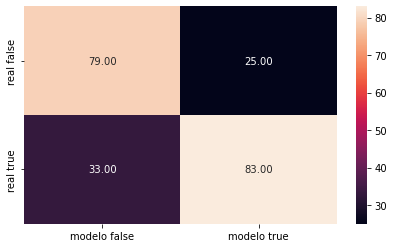

In [192]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

In [193]:
print("\n Acurácia: ", accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))



 Acurácia:  0.7363636363636363
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       104
         1.0       0.77      0.72      0.74       116

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220



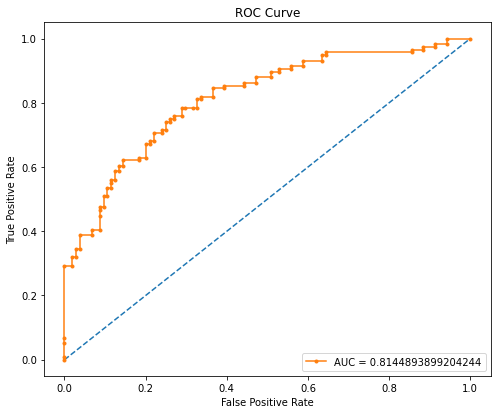

In [194]:
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_prob[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred_prob[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [195]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100.0],
    'solver': ['lbfgs', 'saga','newton-cg']
}

gs_lr = GridSearchCV(LogisticRegression(random_state=0,max_iter=1000), param_grid=params,n_jobs=-1)
gs_lr.fit(X_train, y_train)

y_pred = gs_lr.predict(X_test)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

In [196]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gs_lr.best_estimator_)
print("\n The best score across ALL searched params:\n",gs_lr.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_lr.best_params_)
print("\n Acurácia: ", accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10.0, max_iter=1000, random_state=0, solver='newton-cg')

 The best score across ALL searched params:
 0.7420454545454545

 The best parameters across ALL searched params:
 {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}

 Acurácia:  0.740909090909091
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       104
         1.0       0.78      0.72      0.74       116

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220



In [197]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

mlp = MLPClassifier(max_iter=10000)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
y_pred_prob = mlp.predict_proba(X_test)


 Acurácia:  0.7


<AxesSubplot:>

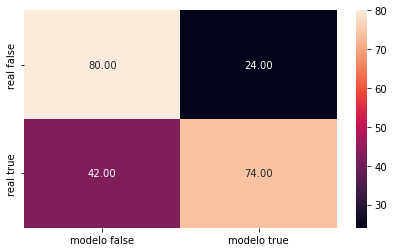

In [198]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

print("\n Acurácia: ", accuracy_score(y_pred, y_test))
sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

In [199]:
parameter_space = {
    'hidden_layer_sizes': [(10,10,10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive','invscaling'],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

mlp2 = MLPClassifier(max_iter=1000)

mlp_tunned = GridSearchCV(mlp2, parameter_space, n_jobs=-1, cv=3, scoring='accuracy') 

#talvez mudar o scoring do GSCV para uma lista com outras métricas tbm

mlp_tunned.fit(X_train,y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",mlp_tunned.best_estimator_)
print("\n The best score across ALL searched params:\n",mlp_tunned.best_score_)
print("\n The best parameters across ALL searched params:\n",mlp_tunned.best_params_)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

KeyboardInterrupt: 

In [457]:
# All results
means = mlp_tunned.cv_results_['mean_test_score']
stds = mlp_tunned.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_tunned.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.577 (+/-0.131) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.727 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.719 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.666 (+/-0.072) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.730 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.659 (+/-0.202) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.524 (+/-0.118) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'invscaling', 'solver'

In [459]:
mlp_tunned = MLPClassifier(alpha=0.1, learning_rate='invscaling', max_iter=1000, solver='lbfgs')

mlp_tunned.fit(X_train, y_train)

y_pred = mlp_tunned.predict(X_test)

print("\n Acurácia: ", accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


 Acurácia:  0.7227272727272728
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       104
         1.0       0.74      0.72      0.73       116

    accuracy                           0.72       220
   macro avg       0.72      0.72      0.72       220
weighted avg       0.72      0.72      0.72       220



<AxesSubplot:>

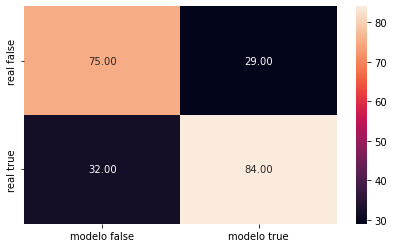

In [460]:
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize = (7,4)) 

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

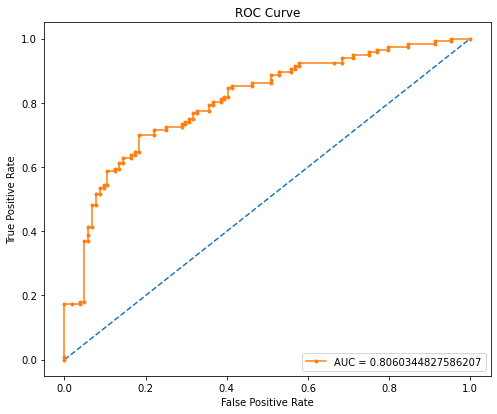

In [461]:
y_pred_prob = mlp_tunned.predict_proba(X_test)
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_prob[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred_prob[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

<AxesSubplot:>

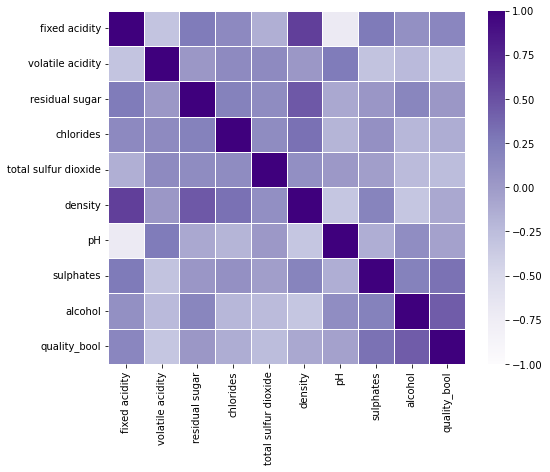

In [25]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='spearman'), vmin = -1, vmax=1, linewidths=.5,cmap='Purples')

In [26]:
X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

In [27]:
parameter_space = {
    'hidden_layer_sizes': [(10,20,10), (30,30,30), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'tol': [1e-5], 
    'alpha': [0.0001, 0.05, 0.1, 0.005, 0.5],
    'learning_rate': ['constant','adaptive','invscaling']
}

adam_parameter_space = {
    'hidden_layer_sizes': [(10,20,10), (30,30,30), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['adam'],
    'tol': [1e-5,1e-6], 
    'beta_1' : [0.2,0.5,0.7,0.9],
    'beta_2' : [0.2,0.5,0.7,0.999],
    'epsilon' : [1e-8,1e-6,1e-7,1e-10],
    'n_iter_no_change' : [10,100,1000],
    'alpha': [0.0001, 0.05, 0.1, 0.005, 0.5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, test_size=0.2)

mlp2 = MLPClassifier(max_iter=500)

random_search = RandomizedSearchCV(mlp2, n_iter=100, param_distributions=adam_parameter_space)
random_search.fit(X,y)

# mlp_tunned = GridSearchCV(mlp2, adam_parameter_space, n_jobs=-1, cv=3, scoring='accuracy') 

# talvez mudar o scoring do GSCV para uma lista com outras métricas tbm

# mlp_tunned.fit(X_train,y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",random_search.best_estimator_)
print("\n The best score across ALL searched params:\n",random_search.best_score_)
print("\n The best parameters across ALL searched params:\n",random_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 MLPClassifier(activation='logistic', alpha=0.005, beta_1=0.7, beta_2=0.2,
              hidden_layer_sizes=(30, 30, 30), max_iter=500,
              n_iter_no_change=100, tol=1e-06)

 The best score across ALL searched params:
 0.7327272727272728

 The best parameters across ALL searched params:
 {'tol': 1e-06, 'solver': 'adam', 'n_iter_no_change': 100, 'hidden_layer_sizes': (30, 30, 30), 'epsilon': 1e-08, 'beta_2': 0.2, 'beta_1': 0.7, 'alpha': 0.005, 'activation': 'logistic'}


In [ ]:
# All results
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.635 (+/-0.034) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.725 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.717 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.545 (+/-0.161) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.735 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.713 (+/-0.080) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.507 (+/-0.037) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'invscaling', 'solver'

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# mlp_clf = MLPClassifier(activation='logistic', alpha=0.005, beta_1=0.7, beta_2=0.2,
#               hidden_layer_sizes=(30, 30, 30), max_iter=500,
#               n_iter_no_change=100, tol=1e-06)

# mlp_clf.fit(X_train,y_train)

y_pred = random_search.predict(X_test)

print("\n Acurácia: ", accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


 Acurácia:  0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       120
         1.0       0.67      0.79      0.72       100

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.74      0.73      0.73       220



<AxesSubplot:>

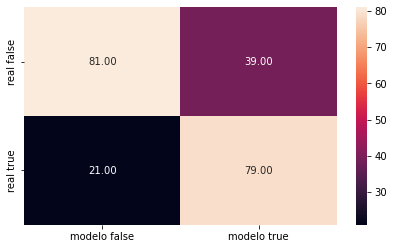

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# Logistic Regression and RandomForest Pipeline

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

<AxesSubplot:>

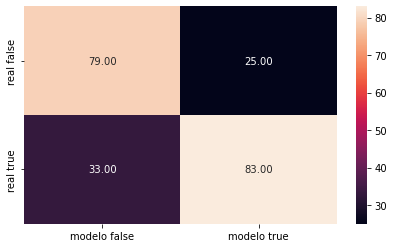

In [201]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

In [202]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,131,5)),
#     'classifier__max_features' : list(range(6,43,4)),
#     'classifier__criterion' : ['gini', 'entropy', 'log_loss']
#     }
# ]

# best-paramgrid
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,121,3)),
    'classifier__max_features' : list(range(1,75,1))}, #criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy') #

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79       104
         1.0       0.81      0.82      0.82       116

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220


 Acurácia:  0.8045454545454546


In [204]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=33, n_estimators=98))])

 The best score across ALL searched params:
 0.8147727272727272

 The best parameters across ALL searched params:
 {'classifier': RandomForestClassifier(max_features=33, n_estimators=98), 'classifier__max_features': 33, 'classifier__n_estimators': 98}


<AxesSubplot:>

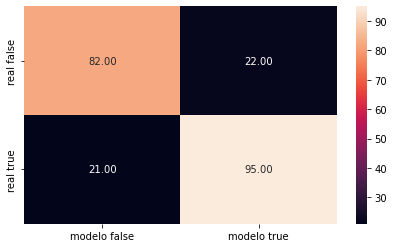

In [205]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

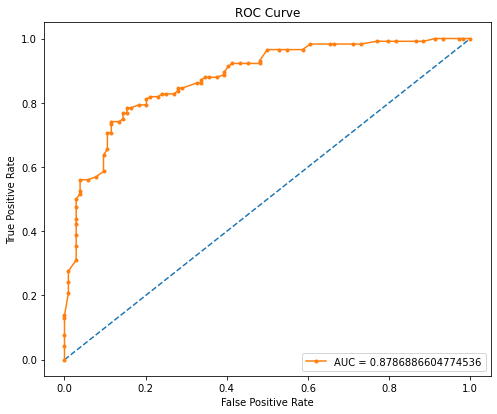

In [206]:
y_pred_prob = clf.predict_proba(X_test)
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_prob[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred_prob[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [ ]:
# clf.fit(X,y)

# Test Data Cleaning 


In [207]:
test

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1100,8.4,0.340,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4
1,1101,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
2,1102,6.1,0.480,0.09,1.7,0.078,18.0,30.0,0.99402,3.45,0.54,11.2
3,1103,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
4,1104,8.0,0.480,0.34,2.2,0.073,16.0,25.0,NaN,3.28,0.66,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
494,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,NaN,3.45,0.58,10.5
495,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
496,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,NaN,0.75,11.0
497,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [208]:
test.isna().sum()

Unnamed: 0               0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                 49
pH                      49
sulphates                0
alcohol                  0
dtype: int64

<AxesSubplot:>

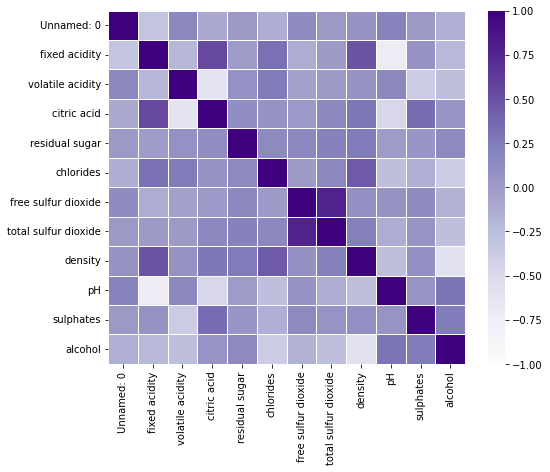

In [209]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(test.corr(method='spearman'), vmin = -1, vmax=1, linewidths=.5,cmap='Purples')

In [210]:
test.drop(columns=['free sulfur dioxide','citric acid'],inplace=True)

<AxesSubplot:>

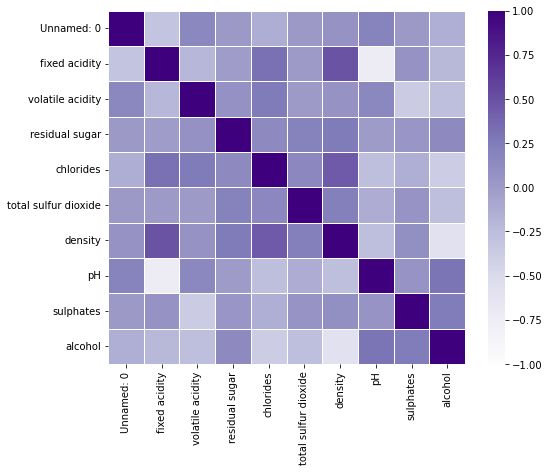

In [211]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(test.corr(method='spearman'), vmin = -1, vmax=1, linewidths=.5,cmap='Purples')

- Let's predict `density` first 

In [212]:
X = test.drop(['Unnamed: 0','pH'], axis = 1).dropna().drop(['density'], axis = 1).values
y = test.drop(['Unnamed: 0','pH'], axis = 1).dropna()['density'].values

In [214]:
# param_grid = {"n_estimators": list(range(10,121,3)),
#               'max_features' : list(range(1,10,1))
#               }

# random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), n_iter=10000, 
#                                                         param_distributions=param_grid, cv=5)
# random_search.fit(X,y)

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",random_search.best_estimator_)
# print("\n The best parameters across ALL searched params:\n",random_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features=3, n_estimators=112, random_state=42)

 The best parameters across ALL searched params:
 {'n_estimators': 112, 'max_features': 3}


In [215]:
# random_search = RandomForestRegressor(max_features=3, n_estimators=112, random_state=42)

In [216]:
# kf = KFold(n_splits=5)
# r2 = []
# mse = []

# for train_index, test_index in kf.split(X,y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     random_search.fit(X_train, y_train)
#     y_test_pred = random_search.predict(X_test)
    
#     r2.append(r2_score(y_test, y_test_pred))
#     mse.append(mean_squared_error(y_test, y_test_pred))

# print(r2,mse)

[0.7690200545199851, 0.7501289824765431, 0.7459238955630265, 0.5610342323691863, 0.4720496986600258] [6.145356073733195e-07, 6.95198363449825e-07, 3.393063916346914e-07, 1.9291682784157555e-06, 6.93890745110532e-07]


In [217]:
kf = KFold(n_splits=5)
scores = []
scores2 = []

regr = LinearRegression()

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)
    
    scores.append(r2_score(y_test, y_test_pred))
    scores2.append(mean_squared_error(y_test, y_test_pred))

print(scores)
print(scores2)

[0.781484816406893, 0.7383972800352872, 0.42235195094927247, 0.810053015701199, 0.5059545398159824]
[5.813723818776347e-07, 7.278386448977357e-07, 7.714211282975713e-07, 8.347796655482523e-07, 6.493292486347279e-07]


In [224]:
X_nan = test.drop(['Unnamed: 0','pH'], axis = 1)[test.drop(['pH'], axis = 1)['density'].isna()]
X_nan.drop(columns=['density'],inplace=True)
X_nan.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol
4,8.0,0.48,2.2,0.073,25.0,0.66,12.4
10,8.3,0.53,1.4,0.070,14.0,0.64,10.0
17,7.0,0.69,2.5,0.091,21.0,0.60,11.3
22,6.3,0.47,1.4,0.055,33.0,0.48,12.3
38,7.5,0.41,3.7,0.104,94.0,0.58,9.1


In [227]:
y_pred = regr.predict(X_nan)

density_nan_index = test[test.density.isna()].index
test.loc[density_nan_index,'density'] = y_pred

In [230]:
test.isna().sum()

Unnamed: 0               0
fixed acidity            0
volatile acidity         0
residual sugar           0
chlorides                0
total sulfur dioxide     0
density                  0
pH                      49
sulphates                0
alcohol                  0
dtype: int64

- And now we'll fill missing `pH` values also w/ all columns including `density` predicted values 

In [233]:
X = test.dropna().drop(columns=['pH','Unnamed: 0']).values
y = test.dropna().drop(columns=['Unnamed: 0'])['pH'].values

In [234]:
kf = KFold(n_splits=5)
scores = []
scores2 = []

regr = LinearRegression()

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)
    
    scores.append(r2_score(y_test, y_test_pred))
    scores2.append(mean_squared_error(y_test, y_test_pred))

print(scores)
print(scores2)

[0.607702590166521, 0.6242939074776406, 0.6608395559893583, 0.648643978073838, 0.6277557855242457]
[0.00863908638215069, 0.006926331987869367, 0.00885403043369035, 0.00621600421758503, 0.004777267358392178]


In [237]:
param_grid = {"n_estimators": list(range(10,121,3)),
              'max_features' : list(range(1,10,1))
              }

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), n_iter=10000, verbose=1, 
                                                        param_distributions=param_grid)
random_search.fit(X,y)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",random_search.best_estimator_)
print("\n The best parameters across ALL searched params:\n",random_search.best_params_)

Fitting 5 folds for each of 333 candidates, totalling 1665 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features=5, n_estimators=118, random_state=42)

 The best parameters across ALL searched params:
 {'n_estimators': 118, 'max_features': 5}


In [ ]:
# forest = RandomForestRegressor(max_features=5, n_estimators=118, random_state=42)

In [238]:
# kf = KFold(n_splits=5)
# r2 = []
# mse = []

# for train_index, test_index in kf.split(X,y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     forest.fit(X_train, y_train)
#     y_test_pred = forest.predict(X_test)
    
#     r2.append(r2_score(y_test, y_test_pred))
#     mse.append(mean_squared_error(y_test, y_test_pred))

# print(r2,mse)

Fitting 5 folds for each of 333 candidates, totalling 1665 fits
Fitting 5 folds for each of 333 candidates, totalling 1665 fits
Fitting 5 folds for each of 333 candidates, totalling 1665 fits
Fitting 5 folds for each of 333 candidates, totalling 1665 fits
Fitting 5 folds for each of 333 candidates, totalling 1665 fits
[0.572435533512279, 0.5531491610959364, 0.6141031297754045, 0.7071895174862324, 0.6319602168313876] [0.009415729666666704, 0.008237921398954375, 0.010074118882587673, 0.005180247614031747, 0.004723308984660302]


In [247]:
X_nan = test[test['pH'].isna()].drop(columns=['pH','Unnamed: 0'])
y_pred = regr.predict(X_nan)

test.loc[X_nan.index,'pH'] = y_pred
test.isna().sum()

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by LinearRegression.

In [251]:
test.to_csv('Data/test-cleaned.csv',index=False)

# Prediction

In [254]:
test = pd.read_csv('Data/test-cleaned.csv')
test.drop(columns=['Unnamed: 0'])

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.4,0.340,2.1,0.072,36.0,0.993920,3.11000,0.78,12.4
1,7.4,0.490,2.1,0.071,25.0,0.993880,3.35000,0.63,12.0
2,6.1,0.480,1.7,0.078,30.0,0.994020,3.45000,0.54,11.2
3,7.4,0.490,2.1,0.071,25.0,0.993880,3.35000,0.63,12.0
4,8.0,0.480,2.2,0.073,25.0,0.994386,3.28000,0.66,12.4
...,...,...,...,...,...,...,...,...,...
494,6.2,0.600,2.0,0.090,44.0,0.994802,3.45000,0.58,10.5
495,5.9,0.550,2.2,0.062,51.0,0.995120,3.52000,0.76,11.2
496,6.3,0.510,2.3,0.076,40.0,0.995740,3.49758,0.75,11.0
497,5.9,0.645,2.0,0.075,44.0,0.995470,3.57000,0.71,10.2


In [269]:
y_pred = clf.predict(test.drop(columns=['Unnamed: 0']))

sub_df = pd.DataFrame(y_pred, columns = ['quality_bool'], index = test['Unnamed: 0'], dtype=int)
sub_df.value_counts()

quality_bool
1               296
0               203
dtype: int64

In [271]:
sub_df.to_csv('Submissions/sub_df_1.csv',index='Unnamed: 0')